# Liskov
- Carlos Emiliano Mendoza Hernandez
- Alan Magno Martinez Munoz
- Erick Yair Aguilar Martinez

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Ejercicio 3

In [204]:
data = pd.read_csv("cars.csv")
print(data.shape)

(1728, 7)


In [205]:
# Tomamos la segunda mitad de las filas
data = data.iloc[round(data.shape[0]/2):]
print(data.shape)
np.unique_counts(data['buying'])

(864, 7)


UniqueCountsResult(values=array(['low', 'med'], dtype=object), counts=array([432, 432]))

In [206]:
# Eliminamos la columna class
data_1 = data.drop("class", axis=1)
data_1.head()

,buying,maint,doors,persons,lug_boot,safety
864,med,vhigh,2,2,small,low
865,med,vhigh,2,2,small,med
866,med,vhigh,2,2,small,high
867,med,vhigh,2,2,med,low
868,med,vhigh,2,2,med,med


Tenemos variables categoricas, donde las categorias no tienen un orden razonable para calcular distancias. Por lo tanto, la mejor opcion de agrupamiento es k modes.

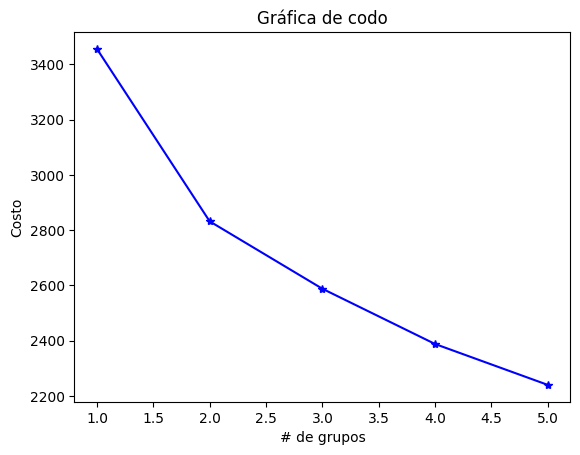

In [207]:
from kmodes.kmodes import KModes
# Gráfica del codo para determinar el número de grupos
cost = []
k = range(1,6)
for nc in k:
    km = KModes(n_clusters=nc, init='random', n_init=5, verbose=False)
    km.fit_predict(data_1)
    cost.append(km.cost_)

plt.plot(k, cost, 'b*-')
plt.title('Gráfica de codo')
plt.xlabel('# de grupos')
plt.ylabel('Costo')
plt.show()

La grafica de codo sugiere que se utilicen 3 grupos

In [208]:
# 3 grupos
km = KModes(n_clusters=3, init='random', n_init=5, verbose=False)
clusters = km.fit_predict(data_1)
clusters, km.cluster_centroids_

(array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0,
        1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2,
        2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 

In [209]:
data_1.insert(0, "cluster", clusters)
data_1.head(10)

,cluster,buying,maint,doors,persons,lug_boot,safety
864,0,med,vhigh,2,2,small,low
865,0,med,vhigh,2,2,small,med
866,0,med,vhigh,2,2,small,high
867,1,med,vhigh,2,2,med,low
868,0,med,vhigh,2,2,med,med
869,0,med,vhigh,2,2,med,high
870,0,med,vhigh,2,2,big,low
871,0,med,vhigh,2,2,big,med
872,0,med,vhigh,2,2,big,high
873,1,med,vhigh,2,4,small,low


In [210]:
# 4 grupos
km = KModes(n_clusters=4, init='random', n_init=5, verbose=False)
clusters = km.fit_predict(data_1)
clusters, km.cluster_centroids_

(array([3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 0, 0, 3, 1, 1, 3, 1, 1, 3,
        3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
        0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 3, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 3,
        1, 3, 3, 0, 3, 1, 1, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0,
        3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 0, 1, 1, 3,
        1, 1, 0, 0, 1, 1, 1, 1, 3, 1, 1, 3, 0, 1, 1, 1, 1, 3, 0, 0, 0, 0,
        0, 0, 0, 1, 3, 3, 1, 0, 0, 0, 2, 2, 1, 3, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 3,
        3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 2,
        1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 0, 1, 1, 1, 1, 2, 1, 1,
        3, 1, 1, 2, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 3, 3, 1, 3, 0, 0, 2,
        2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 

In [211]:
data_2 = data_1.copy()
data_2.drop("cluster", axis=1, inplace=True)
data_2.insert(0, "cluster", clusters)
data_2.head(10)

,cluster,buying,maint,doors,persons,lug_boot,safety
864,3,med,vhigh,2,2,small,low
865,1,med,vhigh,2,2,small,med
866,1,med,vhigh,2,2,small,high
867,3,med,vhigh,2,2,med,low
868,1,med,vhigh,2,2,med,med
869,1,med,vhigh,2,2,med,high
870,1,med,vhigh,2,2,big,low
871,1,med,vhigh,2,2,big,med
872,1,med,vhigh,2,2,big,high
873,3,med,vhigh,2,4,small,low


In [212]:
data.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
864,med,vhigh,2,2,small,low,unacc
865,med,vhigh,2,2,small,med,unacc
866,med,vhigh,2,2,small,high,unacc
867,med,vhigh,2,2,med,low,unacc
868,med,vhigh,2,2,med,med,unacc
869,med,vhigh,2,2,med,high,unacc
870,med,vhigh,2,2,big,low,unacc
871,med,vhigh,2,2,big,med,unacc
872,med,vhigh,2,2,big,high,unacc
873,med,vhigh,2,4,small,low,unacc


In [213]:
import itertools
from sklearn.metrics import accuracy_score
permutations = list(itertools.permutations([0, 1, 2, 3]))

In [215]:
# mapeo de las clases a valores numéricos
scores = []
for perm in permutations:
    datacpy = data.copy()
    datacpy["class"] = data["class"].map({"unacc":perm[0], "acc":perm[1], "good":perm[2], "vgood":perm[3]})
    scores.append(accuracy_score(data["class"], data_2["cluster"]))

max_score = max(scores)
max_score

0.0

### Ejercicio 5

In [216]:
train_data = pd.read_csv('train.csv', sep=';')
train_data = train_data.drop(columns=["Unnamed: 0"])
train_data.head()

,title,text,label
0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [217]:
# Concat the title and the content of the news
train_data["text"] = train_data["title"] + " " + train_data["text"]
train_data = train_data.drop(columns=["title"])
train_data.head()

,text,label
0,Palestinians switch off Christmas lights in Be...,1
1,China says Trump call with Taiwan president wo...,1
2,FAIL! The Trump Organization’s Credit Score W...,0
3,Zimbabwe military chief's China trip was norma...,1
4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,0


In [218]:
# Bayesiano multinomial
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(train_data["text"])
y = train_data["label"]

nb = MultinomialNB()
nb.fit(X, y)

MultinomialNB()

In [219]:
evaluation = pd.read_csv('evaluation.csv', sep=';')
evaluation = evaluation.drop(columns=["Unnamed: 0"])
evaluation["text"] = evaluation["title"] + " " + evaluation["text"]
evaluation = evaluation.drop(columns=["title"])
evaluation.head()

,text,label
0,"Sanders back in U.S. Senate, blasts 'coloniali...",1
1,Kremlin: Syria peoples' congress being 'active...,1
2,Oregon Cop Convicted Of Shattering Biker’s Co...,0
3,Twitter Erupts With Glee Over #CruzSexScandal...,0
4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,0


In [220]:
y_pred = nb.predict(cv.transform(evaluation["text"]))
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [221]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(evaluation["label"], y_pred)
precision = precision_score(evaluation["label"], y_pred, average="macro")
recall = recall_score(evaluation["label"], y_pred, average="macro")
f1 = f1_score(evaluation["label"], y_pred, average="macro")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1: 0.94


In [222]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X, y)

y_pred = xgb.predict(cv.transform(evaluation["text"]))
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [223]:
accuracy = accuracy_score(evaluation["label"], y_pred)
precision = precision_score(evaluation["label"], y_pred)
recall = recall_score(evaluation["label"], y_pred)
f1 = f1_score(evaluation["label"], y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1: 0.99


#### Comparacion de modelos
El mejor modelo es el de XGBoost, ya que tiene un mejor desempeño en todas las métricas.

### Ejercicio 8

Bayesiano multinomial

In [224]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import pandas as pd

# Crear el pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Entrenar el modelo usando el pipeline
pipeline.fit(train_data["text"], train_data["label"])

# Cargar y preparar los datos de evaluación
evaluation = pd.read_csv('evaluation.csv', sep=';')
evaluation = evaluation.drop(columns=["Unnamed: 0"])
evaluation["text"] = evaluation["title"] + " " + evaluation["text"]
evaluation = evaluation.drop(columns=["title"])
evaluation.head()

# Predecir usando el pipeline
y_pred = pipeline.predict(evaluation["text"])
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [225]:
# Calcular las métricas
accuracy = accuracy_score(evaluation["label"], y_pred)
precision = precision_score(evaluation["label"], y_pred, average="macro")
recall = recall_score(evaluation["label"], y_pred, average="macro")
f1 = f1_score(evaluation["label"], y_pred, average="macro")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")


Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1: 0.94


XGBoost

In [226]:
# Crear el pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', XGBClassifier())
])

# Entrenar el modelo usando el pipeline
pipeline.fit(train_data["text"], train_data["label"])

# Predecir usando el pipeline
y_pred = pipeline.predict(evaluation["text"])

# Calcular métricas de evaluación
accuracy = accuracy_score(evaluation["label"], y_pred)
precision = precision_score(evaluation["label"], y_pred, average='weighted')
recall = recall_score(evaluation["label"], y_pred, average='weighted')
f1 = f1_score(evaluation["label"], y_pred, average='weighted')

# Mostrar las métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1: 0.98
